<a href="https://colab.research.google.com/github/ronakbihani123/supervised_ml_algorithms/blob/main/normalize%2Cstandardize%2Ccolumn_transformer%2C_pipeline_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si = SimpleImputer()

In [ ]:
df["Age"] = si.fit_transform(df[["Age"]])

In [ ]:
df['Cabin'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['Cabin']]).flatten()

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
y = df["Fare"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()
df["Name"] = lb.fit_transform(df["Name"])

In [ ]:
df["Sex"] = lb.fit_transform(df["Sex"])
df["Ticket"] = lb.fit_transform(df["Ticket"])
df["Cabin"] = lb.fit_transform(df["Cabin"])
df["Embarked"] = lb.fit_transform(df["Embarked"])

In [ ]:
x = df.drop(columns = "Fare")
y = df["Fare"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=42)
x_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
336,1228,0,2,413,1,32.00000,0,0,79,76,2
31,923,0,2,190,1,24.00000,2,0,283,76,2
84,976,0,2,221,1,30.27259,0,0,72,76,1
287,1179,0,1,351,1,24.00000,1,0,52,12,2
317,1209,0,2,319,1,19.00000,0,0,122,76,2
...,...,...,...,...,...,...,...,...,...,...,...
71,963,0,3,263,1,21.00000,0,0,194,76,2
106,998,0,3,52,1,21.00000,0,0,153,76,1
270,1162,0,1,252,1,46.00000,0,0,33,38,0
348,1240,0,2,157,1,24.00000,0,0,82,76,2


In [ ]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,1,3,403,0,47.0,1,0,221,7.0000,76,2


In [ ]:
np.round(x_train.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,334.00,334.00,334.00,334.00,334.00,334.00
mean,1100.31,0.35,2.27,30.15,0.47,0.40
std,115.98,0.48,0.84,12.98,0.94,0.94
min,893.00,0.00,1.00,0.33,0.00,0.00
25%,1006.25,0.00,1.00,22.62,0.00,0.00
50%,1100.50,0.00,3.00,30.27,0.00,0.00
75%,1197.75,1.00,3.00,35.00,1.00,0.00
max,1309.00,1.00,3.00,76.00,8.00,9.00


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)


In [ ]:
x_train_new = pd.DataFrame(x_train_sc,columns=x_train.columns)
x_train_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1.102645,-0.739119,-0.319382,1.629677,0.739119,0.142827,-0.498312,-0.431963,-0.923551,0.455034,0.707836
1,-1.531159,-0.739119,-0.319382,-0.197424,0.739119,-0.474661,1.621895,-0.431963,0.970473,0.455034,0.707836
2,-1.073481,-0.739119,-0.319382,0.056568,0.739119,0.009495,-0.498312,-0.431963,-0.988542,0.455034,-0.462546
3,0.679510,-0.739119,-1.504644,1.121694,0.739119,-0.474661,0.561792,-0.431963,-1.174230,-2.872647,0.707836
4,0.938572,-0.739119,-0.319382,0.859509,0.739119,-0.860591,-0.498312,-0.431963,-0.524320,0.455034,0.707836
...,...,...,...,...,...,...,...,...,...,...,...
329,-1.185742,-0.739119,0.865880,0.400686,0.739119,-0.706219,-0.498312,-0.431963,0.144159,0.455034,0.707836
330,-0.883502,-0.739119,0.865880,-1.328096,0.739119,-0.706219,-0.498312,-0.431963,-0.236503,0.455034,-0.462546
331,0.532707,-0.739119,-1.504644,0.310560,0.739119,1.223432,-0.498312,-0.431963,-1.350634,-1.520776,-1.632928
332,1.206270,-0.739119,-0.319382,-0.467802,0.739119,-0.474661,-0.498312,-0.431963,-0.895697,0.455034,0.707836


In [ ]:
np.round(x_train_new.describe(),2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
count,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.79,-0.74,-1.50,-1.75,-1.35,-2.30,-0.50,-0.43,-1.65,-3.50,-1.63
25%,-0.81,-0.74,-1.50,-0.86,-1.35,-0.58,-0.50,-0.43,-0.89,0.46,-0.46
50%,0.00,-0.74,0.87,0.03,0.74,0.01,-0.50,-0.43,0.00,0.46,0.71
75%,0.84,1.35,0.87,0.88,0.74,0.37,0.56,-0.43,0.92,0.46,0.71
max,1.80,1.35,0.87,1.66,0.74,3.54,7.98,9.19,1.70,0.46,0.71


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
imn = MinMaxScaler()


In [ ]:
x_train_imn = imn.fit_transform(x_train)

In [ ]:
x_train_imn_new = pd.DataFrame(x_train_imn,columns=x_train.columns)
x_train_imn_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,0.805288,0.0,0.5,0.990408,1.0,0.418528,0.000,0.0,0.216066,1.000000,1.0
1,0.072115,0.0,0.5,0.455635,1.0,0.312806,0.250,0.0,0.781163,1.000000,1.0
2,0.199519,0.0,0.5,0.529976,1.0,0.395700,0.000,0.0,0.196676,1.000000,0.5
3,0.687500,0.0,0.0,0.841727,1.0,0.312806,0.125,0.0,0.141274,0.157895,1.0
4,0.759615,0.0,0.5,0.764988,1.0,0.246729,0.000,0.0,0.335180,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
329,0.168269,0.0,1.0,0.630695,1.0,0.273160,0.000,0.0,0.534626,1.000000,1.0
330,0.252404,0.0,1.0,0.124700,1.0,0.273160,0.000,0.0,0.421053,1.000000,0.5
331,0.646635,0.0,0.0,0.604317,1.0,0.603542,0.000,0.0,0.088643,0.500000,0.0
332,0.834135,0.0,0.5,0.376499,1.0,0.312806,0.000,0.0,0.224377,1.000000,1.0


In [ ]:
np.round(x_train_imn_new.describe(),2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
count,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00,334.00
mean,0.50,0.35,0.63,0.51,0.65,0.39,0.06,0.04,0.49,0.88,0.70
std,0.28,0.48,0.42,0.29,0.48,0.17,0.12,0.10,0.30,0.25,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.27,0.00,0.00,0.26,0.00,0.29,0.00,0.00,0.23,1.00,0.50
50%,0.50,0.00,1.00,0.52,1.00,0.40,0.00,0.00,0.49,1.00,1.00
75%,0.73,1.00,1.00,0.77,1.00,0.46,0.12,0.00,0.77,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
df = pd.read_csv("/content/userbehaviour.csv")
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [ ]:
df.isnull().sum()

,0
userid,0
Average Screen Time,0
Average Spent on App (INR),0
Left Review,0
Ratings,0
New Password Request,0
Last Visited Minutes,0
Status,0


In [ ]:
x = df.drop(columns = "Status")
y = df["Status"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state=42)
x_train

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
778,1779,21.0,892.0,0,7,7,4942
286,1287,30.0,416.0,0,5,4,2998
165,1166,29.0,91.0,1,7,8,3241
960,1961,22.0,706.0,0,9,4,4851
493,1494,16.0,767.0,1,8,5,2602
...,...,...,...,...,...,...,...
106,1107,25.0,733.0,0,9,2,4806
270,1271,35.0,217.0,1,7,4,2463
860,1861,20.0,993.0,0,10,5,4930
435,1436,7.0,9.0,1,4,7,4060


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# df.isnull().sum()

In [ ]:
numeric_data = ["userid" , "Average Screen Time" ,"Average Spent on App (INR)" ,
                  "Left Review" , "Ratings" , "New Password Request" , "Last Visited Minutes" ]

In [ ]:
# categorical_data = ["Status"]

In [ ]:
numeric_pipeline = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy="mean")),
    ("scaler" , StandardScaler())
])

In [ ]:
# categorical_pipeline = Pipeline(steps = [
#     ("imputer" , SimpleImputer(strategy="most_frequent")),
#     ("encoder" , OneHotEncoder(handle_unknown = "ignore"))
# ])

In [ ]:
preprocessor  = ColumnTransformer(transformers = [
    ("numeric" , numeric_pipeline , numeric_data)
    # ("categorical" , categorical_pipeline , categorical_data)
])


In [ ]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['userid', 'Average Screen Time',
                                  'Average Spent on App (INR)', 'Left Review',
                                  'Ratings', 'New Password Request',
                                  'Last Visited Minutes'])])

In [ ]:
x_train_new = preprocessor.fit_transform(x_train)
x_train_new

array([[ 0.97176011, -0.21513715,  1.49054762, ...,  0.19846576,
         0.7300156 , -0.02997633],
       [-0.72683245,  0.41297948, -0.02347523, ..., -0.53737712,
        -0.33436846, -0.2513882 ],
       [-1.14457574,  0.34318874, -1.05720931, ...,  0.19846576,
         1.08481029, -0.22371171],
       ...,
       [ 1.25485887, -0.28492789,  1.81180036, ...,  1.30223007,
         0.02042623, -0.03134307],
       [-0.21242129, -1.19220747, -1.31802837, ..., -0.90529855,
         0.7300156 , -0.13043172],
       [-1.36207845,  1.59942201,  1.29334296, ..., -0.53737712,
        -0.68916315, -0.09694659]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [ ]:
df["Last Visited Minutes"].describe()

,Last Visited Minutes
count,999.000000
mean,5110.898899
std,8592.036516
min,201.000000
25%,1495.500000
50%,2865.000000
75%,4198.000000
max,49715.000000


<Axes: xlabel='Last Visited Minutes'>

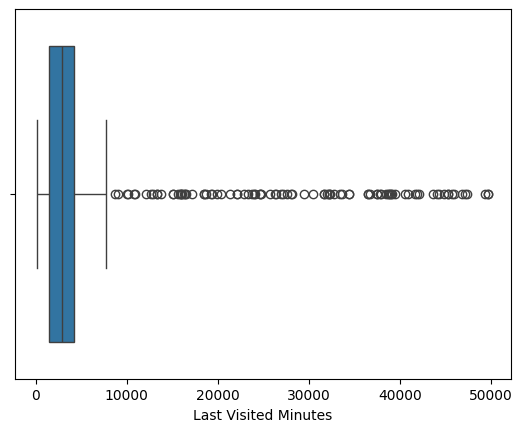

In [ ]:
sns.boxplot(x = df["Last Visited Minutes"])

In [ ]:
percentile25 = df["Last Visited Minutes"].quantile(0.25)
percentile75 = df["Last Visited Minutes"].quantile(0.75)

In [ ]:
percentile25

np.float64(1495.5)

In [ ]:
percentile75

np.float64(4198.0)

In [ ]:
IQR = percentile75 - percentile25

In [ ]:
IQR

np.float64(2702.5)

In [ ]:
upper_limit = percentile75+1.5*IQR
upper_limit

np.float64(8251.75)

In [ ]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-2558.25)

In [ ]:
df[df["Last Visited Minutes"]>upper_limit]

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
12,1013,1.0,49.0,0,3,7,9008,Installed
38,1039,1.0,97.0,0,1,7,37959,Uninstalled
43,1044,4.0,93.0,0,2,8,49334,Uninstalled
46,1047,3.0,34.0,1,5,6,39016,Uninstalled
...,...,...,...,...,...,...,...,...
949,1950,0.0,95.0,0,1,10,16324,Uninstalled
955,1956,4.0,22.0,0,5,8,10845,Installed
956,1957,2.0,31.0,0,5,7,15904,Uninstalled
978,1979,1.0,73.0,0,3,13,45734,Uninstalled


In [ ]:
df[df["Last Visited Minutes"]<lower_limit]

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status


In [ ]:
new_df = df[df["Last Visited Minutes"] < upper_limit]

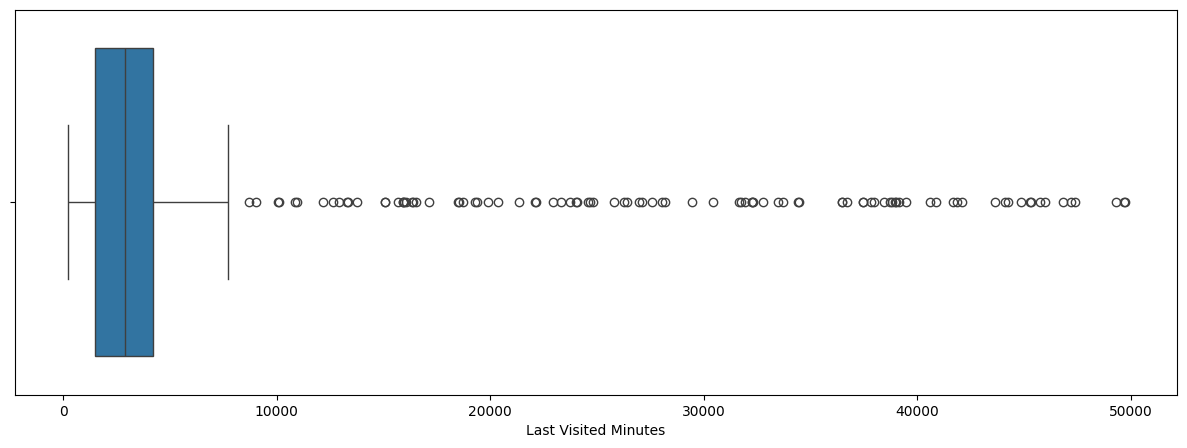

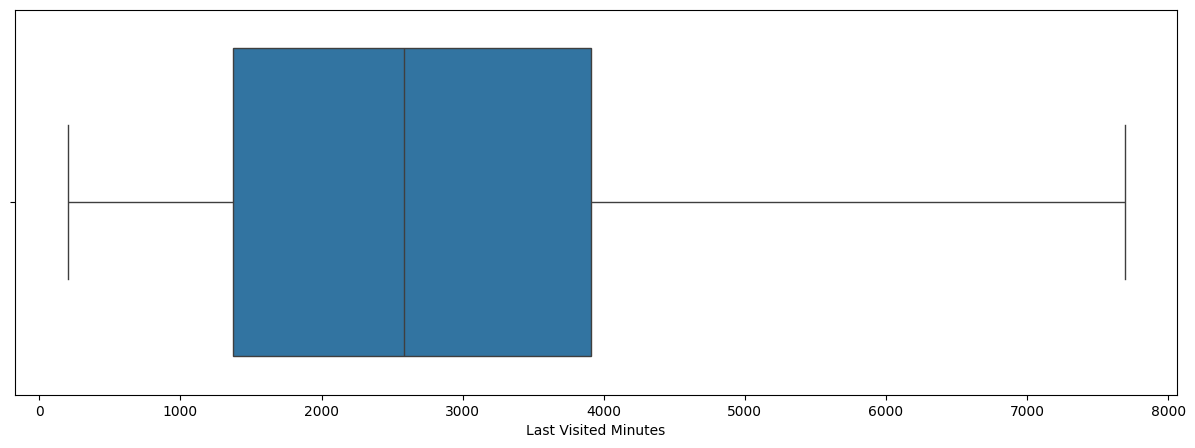

In [ ]:
plt.figure( figsize=(15, 5))
sns.boxplot(x = df["Last Visited Minutes"])
plt.figure( figsize=(15, 5))
sns.boxplot(x = new_df["Last Visited Minutes"])
plt.show()

In [ ]:
new_df_cap = df.copy()

In [ ]:
new_df_cap["Last Visited Minutes"] = np.where(
    new_df_cap["Last Visited Minutes"] > upper_limit,
    upper_limit,
    np.where(
    new_df_cap ["Last Visited Minutes"] < lower_limit,
    lower_limit,
    new_df_cap["Last Visited Minutes"])
)

In [ ]:
new_df_cap

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990.00,Installed
1,1002,0.0,54.0,0,4,8,8251.75,Uninstalled
2,1003,37.0,207.0,0,8,5,971.00,Installed
3,1004,32.0,445.0,1,6,2,799.00,Installed
4,1005,45.0,427.0,1,5,6,3668.00,Installed
...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865.00,Installed
995,1996,43.0,61.0,0,6,8,1327.00,Installed
996,1997,47.0,761.0,0,6,1,1936.00,Installed
997,1998,6.0,73.0,1,5,1,3436.00,Installed
